In [2]:
import numpy as np
import matplotlib.pyplot as plt

import gensim.downloader
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors

from sklearn.decomposition import PCA

In [3]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [4]:
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove_vectors.save_word2vec_format(word2vec_glove_file)

In [5]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [6]:
model.most_similar('apple')

[('microsoft', 0.7449405193328857),
 ('ibm', 0.6821643114089966),
 ('intel', 0.6778088212013245),
 ('software', 0.6775422692298889),
 ('dell', 0.6741442680358887),
 ('pc', 0.6678153276443481),
 ('macintosh', 0.6617538332939148),
 ('iphone', 0.6595612168312073),
 ('ipod', 0.6534676551818848),
 ('hewlett', 0.6516579389572144)]

In [7]:
model.most_similar(negative='apple')

[('hizon', 0.476315438747406),
 ('waly', 0.4709792733192444),
 ('marc-andre', 0.4691624343395233),
 ('kashinath', 0.4621971845626831),
 ('jharkand', 0.45896580815315247),
 ('belkhadem', 0.45566409826278687),
 ('joal', 0.45194777846336365),
 ('römischen', 0.45179906487464905),
 ('aldona', 0.45006662607192993),
 ('hincmar', 0.4497555196285248)]

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print(f"king - man + woman = {result[0][0]}")

king - man + woman = queen


In [9]:
print(f"Man is to king as woman is to {result[0][0]}.")

Man is to king as woman is to queen.


In [10]:
def analogy(x1, x2, x3):
    result = model.most_similar(positive=[x3, x2], negative=[x1])
    return result[0][0]

In [11]:
analogy("man", "king", "woman")

'queen'

In [12]:
analogy("asgardian", "asgard", "nepali")

'nepal'

In [13]:
analogy("france", "wine", "russia")

'vodka'

In [14]:
model.doesnt_match(["lobster", "prawn", "shrimp", "momo"])

'momo'

In [15]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

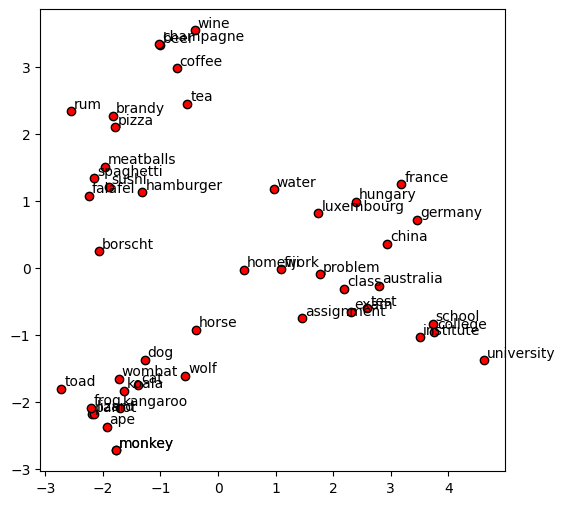

In [16]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

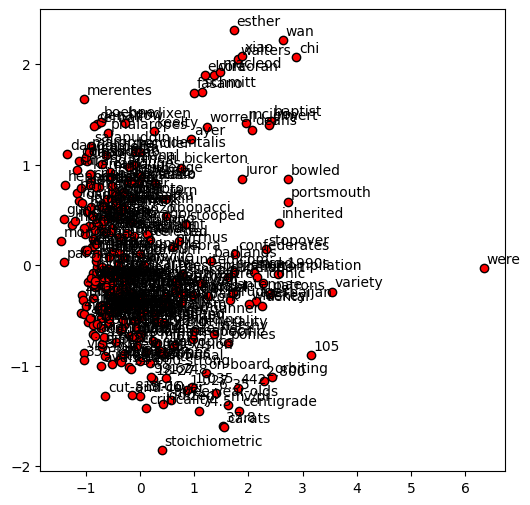

In [17]:
display_pca_scatterplot(model, sample=300)